## Solving Exercises from Thomas Wong Book using Qiskit: 



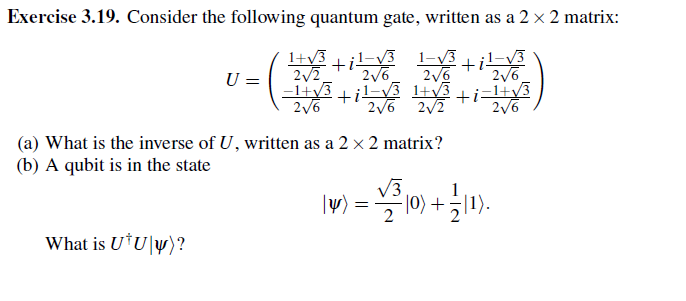

### Writing the $L_AT_EX$ : 

$\text{Consider the following quantum gate U, written as} \ 2 \times 2 \text{matrix:}$  


$$
U \ = \ \begin{bmatrix} 
\frac{1+\sqrt{3}}{2\sqrt{2}} + i \frac{1-\sqrt{3}}{2\sqrt{6}} & 
\frac{1-\sqrt{3}}{2\sqrt{6}} + i \frac{1-\sqrt{3}}{2\sqrt{6}} \\ 
\frac{-1+\sqrt{3}}{2\sqrt{6}} + i \frac{1-\sqrt{3}}{2\sqrt{6}} & 
\frac{1+\sqrt{3}}{2\sqrt{2}}  + i \frac{-1+\sqrt{3}}{2\sqrt{6}} \\
\end{bmatrix} 
$$

1. $\text{What is the inverse of } \ U \text{, written as} \ 2 \times 2 \ \text{matrix?}$
2. $\text{For a qubit is in state, calculate: } U^\dagger U\vert \psi \rangle$

$$
\vert \psi \rangle = \frac{\sqrt{3}}{2} \vert 0 \rangle + \frac{1}{2} \vert 1 \rangle
$$


In [1]:
from qiskit import QuantumCircuit, Aer, execute 
from qiskit.visualization import plot_histogram, visualize_transition, plot_bloch_multivector
from qiskit_textbook.tools import array_to_latex
import cmath
import math

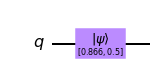

In [2]:
num_qb = 1
qc1 = QuantumCircuit(num_qb)

random_initial_ket = [math.sqrt(3)/2, 0.5]
qubit_index = 0 

qc1.initialize(random_initial_ket,qubit_index)

qc1.draw("mpl")

In [3]:
backend2 = Aer.get_backend("unitary_simulator")
out2 = execute(qc1,backend2).result().get_unitary()
array_to_latex(out2, pretext="\\text{Psi = }")

<IPython.core.display.Math object>

In [4]:

backend1 = Aer.get_backend("statevector_simulator")
out1 = execute(qc1,backend1).result().get_statevector()
array_to_latex(out1, pretext="\\text{Psi = }")

 


<IPython.core.display.Math object>

## Note: 
Above mentioned approach is wrong. The righ approach is mentioned in [this](https://quantumcomputing.stackexchange.com/a/8270/20084) SO Post.

### Correct approach: define a gate from Unitary matrix: 

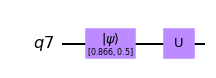

In [5]:
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.quantum_info.operators import Operator

num_qb = 1
qb_index = 0
controls = QuantumRegister(num_qb)
circuit = QuantumCircuit(controls)


random_initial_ket = [math.sqrt(3)/2, 0.5]
qubit_index = 0 
circuit.initialize(random_initial_ket,qubit_index)

a11 = complex( (1+cmath.sqrt(3))/(2*cmath.sqrt(2)), (1-cmath.sqrt(3))/(2*cmath.sqrt(6)) )
a12 = complex( (1-cmath.sqrt(3))/(2*cmath.sqrt(6)), (1-cmath.sqrt(3))/(2*cmath.sqrt(6)) )
a21 = complex( (-1+cmath.sqrt(3))/(2*cmath.sqrt(6)), (1-cmath.sqrt(3))/(2*cmath.sqrt(6)) )
a22 = complex( (1+cmath.sqrt(3))/(2*cmath.sqrt(2)), (-1+cmath.sqrt(3))/(2*cmath.sqrt(6)) )


## Please note the matrix MUST be unitary. 
# If this is NOT unitary then qiskit will throw error: ExtensionError: 'Input matrix is not unitary.'
# Also, Notice how this matrix is transposed not the actual one. 
U = Operator([
    [a11, a21],
    [a12, a22]
])
circuit.unitary(U, qb_index, label='U')

circuit.draw("mpl")

In [6]:
backend2 = Aer.get_backend("unitary_simulator")
out2 = execute(circuit,backend2).result().get_unitary()
array_to_latex(out2, pretext="\\text{Psi = }")

<IPython.core.display.Math object>

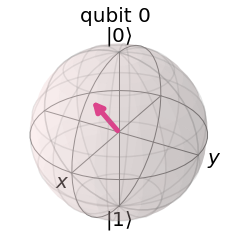

In [7]:
backend1 = Aer.get_backend("statevector_simulator")
out1 = execute(circuit,backend1).result().get_statevector()
plot_bloch_multivector(out1)

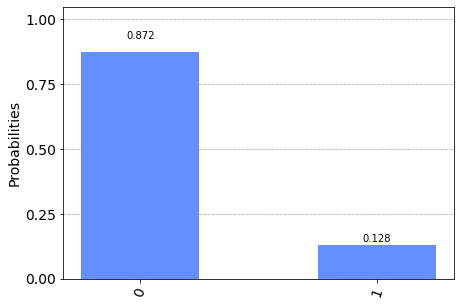

In [8]:
plot_histogram(execute(circuit,backend1).result().get_counts())

## Calculate the operation: 



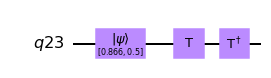

In [9]:
from qiskit import QuantumCircuit, QuantumRegister
from qiskit.quantum_info.operators import Operator
import math
import cmath

num_qb = 1
qb_index = 0
controls = QuantumRegister(num_qb)
circuit = QuantumCircuit(controls)


random_initial_ket = [math.sqrt(3)/2, 0.5]
qubit_index = 0 
circuit.initialize(random_initial_ket,qubit_index)

a11 = complex( (1+cmath.sqrt(3))/(2*cmath.sqrt(2)), (1-cmath.sqrt(3))/(2*cmath.sqrt(6)) )
a12 = complex( (1-cmath.sqrt(3))/(2*cmath.sqrt(6)), (1-cmath.sqrt(3))/(2*cmath.sqrt(6)) )
a21 = complex( (-1+cmath.sqrt(3))/(2*cmath.sqrt(6)), (1-cmath.sqrt(3))/(2*cmath.sqrt(6)) )
a22 = complex( (1+cmath.sqrt(3))/(2*cmath.sqrt(2)), (-1+cmath.sqrt(3))/(2*cmath.sqrt(6)) )


## Please note the matrix MUST be unitary. 
# If this is NOT unitary then qiskit will throw error: ExtensionError: 'Input matrix is not unitary.'
# Also, Notice how this matrix is transposed not the actual one. 
U = Operator([
    [a11, a21],
    [a12, a22]
])
circuit.unitary(U, qb_index, label='T')

circuit.tdg(qb_index)

circuit.draw("mpl")

In [10]:
backend2 = Aer.get_backend("unitary_simulator")
out2 = execute(circuit,backend2).result().get_unitary()
array_to_latex(out2, pretext="\\text{Psi = }")

<IPython.core.display.Math object>

In [12]:
backend1 = Aer.get_backend("statevector_simulator")
out1 = execute(circuit,backend1).result().get_statevector()
#plot_bloch_multivector(out1)
array_to_latex(out1, pretext="\\text{Psi = }")

<IPython.core.display.Math object>